# Visualization of California Wildfire Trends

This is a data visualization project based on the wildfire data obtained from the State of California. We used the California Department of Forestry and Fire Protection (Cal Fire) Fire Perimeters Geodatabase, which records forest fires of 10 acres or greater, brush fires of 30 acres and greater, and grass fires of 300 acres or greater.

In [159]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
import seaborn as sns
import calendar

%matplotlib inline

## Data Loading

In [160]:
df = {}

xls = pd.ExcelFile("Fires_100.xlsx")

for key in ["2017", "2016", "2015", "2014"]:
    df[key] = pd.read_excel(xls, key)

In [161]:
for key in ["2017", "2016", "2015", "2014"]:
    print("-----------------------------------------------------")
    print("Year "+str(key)+":")
    print(df[key].dtypes)
    print("Shape: ",df[key].shape)
    print("-----------------------------------------------------")

-----------------------------------------------------
Year 2017:
YEAR_                  int64
STATE                 object
AGENCY                object
UNIT_ID               object
FIRE_NAME             object
INC_NUM                int64
ALARM_DATE    datetime64[ns]
CONT_DATE     datetime64[ns]
CAUSE                 object
COMMENTS              object
REPORT_AC             object
GIS_ACRES            float64
C_METHOD              object
OBJECTIVE             object
dtype: object
Shape:  (182, 14)
-----------------------------------------------------
-----------------------------------------------------
Year 2016:
YEAR           object
STATE          object
AGENCY         object
UNIT_ID        object
FIRE_NAME      object
INC_NUM        object
ALARM_DATE     object
CONT_DATE      object
CAUSE          object
COMMENTS       object
REPORT_AC      object
GIS_ACRES     float64
C_METHOD       object
OBJECTIVE      object
dtype: object
Shape:  (11795, 14)
------------------------------------

Above are the columns and data types in each of the dataframes. QUite clearly some dataframes have more columns than the others and more instances as well. However, we dont need all the columns for this visualization project and therefore only the useful features will be preserved.

## Data Preparation

In [165]:
df["2017"] = df["2017"].rename(columns={"YEAR_": "YEAR"})

In [166]:
df["2017"]["YEAR"].unique()

array([2017, 2018], dtype=int64)

Some of the columns have ```NaN``` and ```'<Null>'``` so we will remove rows which contain such values.

In [167]:
df["2016"]["YEAR"].unique()

array([1878, 1895, 1896, 1898, 1900, 1902, 1903, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, '<Null>',
       nan], dtype=object)

In [168]:
df["2016"] = df["2016"][df["2016"]["YEAR"] != '<Null>']

In [169]:
df["2016"] = df["2016"].dropna()

In [170]:
df["2016"]["YEAR"] = df["2016"]["YEAR"].astype(int)

In [171]:
df["2015"]["YEAR"].unique()

array([2015., 2014., 2013., 2012., 2011., 2010., 2009., 2008., 2007.,
       2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999., 1998.,
       1997., 1996., 1995., 1994., 1993., 1992., 1991., 1990., 1989.,
       1988., 1987., 1986., 1985., 1984., 1983., 1982., 1981., 1980.,
       1979., 1978., 1977., 1976., 1975., 1974., 1973., 1972., 1971.,
       1970., 1969., 1968., 1967., 1966., 1965., 1964., 1963., 1962.,
       1961., 1960., 1959., 1958., 1957., 1956., 1955., 1954., 1953.,
       1952., 1951., 1950., 1949., 1948., 1947., 1946., 1945., 1944.,
       1943., 1942., 1941., 1940., 1939., 1938., 1937., 1936., 1935.,
       1934., 1933., 1932., 1931., 1930., 1929., 1928., 1927., 1926.,
       1925., 1924., 1923., 1922., 1921., 1920., 1919., 1918., 1917.,
       1916., 1915., 1914., 1913., 1912., 1911., 1910., 1909., 1908.,
       1907., 1906., 1905., 1903., 1902., 1900., 1898., 1896., 1895.,
       1878.,   nan])

In [172]:
df["2015"] = df["2015"].dropna()

In [173]:
df["2015"]["YEAR"] = df["2015"]["YEAR"].astype(int)

In [174]:
df["2014"]["YEAR"].unique()

array([2014., 2013., 2012., 2011., 2010., 2009., 2008., 2007., 2006.,
       2005., 2004., 2003., 2002., 2001., 2000., 1999., 1998., 1997.,
       1996., 1995., 1994., 1993., 1992., 1991., 1990., 1989., 1988.,
       1987., 1986., 1985., 1984., 1983., 1982., 1981., 1980., 1979.,
       1978., 1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970.,
       1969., 1968., 1967., 1966., 1965., 1964., 1963., 1962., 1961.,
       1960., 1959., 1958., 1957., 1956., 1955., 1954., 1953., 1952.,
       1951., 1950., 1949., 1948., 1947., 1946., 1945., 1944., 1943.,
       1942., 1941., 1940., 1939., 1938., 1937., 1936., 1935., 1934.,
       1933., 1932., 1931., 1930., 1929., 1928., 1927., 1926., 1925.,
       1924., 1923., 1922., 1921., 1920., 1919., 1918., 1917., 1916.,
       1915., 1914., 1913., 1912., 1911., 1910., 1909., 1908., 1907.,
       1906., 1905., 1903., 1902., 1900., 1898., 1896., 1895., 1878.,
         nan])

In [175]:
df["2014"] = df["2014"].dropna()

In [176]:
df["2014"]["YEAR"] = df["2014"]["YEAR"].astype(int)

It turns out that each dataframe, labelled as different years, have data for other years too.

In [177]:
data = pd.concat([df["2017"], df["2016"]], sort=True, ignore_index=True)

In [178]:
data.columns

Index(['AGENCY', 'ALARM_DATE', 'CAUSE', 'COMMENTS', 'CONT_DATE', 'C_METHOD',
       'FIRE_NAME', 'GIS_ACRES', 'INC_NUM', 'OBJECTIVE', 'REPORT_AC', 'STATE',
       'UNIT_ID', 'YEAR'],
      dtype='object')

Here we create a new dataset that only keeps the columns that we require.

In [179]:
filtered_data = data[["YEAR", "ALARM_DATE", 'GIS_ACRES', 'CAUSE']]

In [180]:
filtered_data["CAUSE"].unique()

array(['2 - Equipment Use', '7 - Arson', '10 - Vehicle',
       '14 - Unknown / Unidentified', '11 - Powerline',
       '9 - Miscellaneous', '1 - Lightning', '5 - Debris', '4 - Campfire',
       '3 - Smoking', '15 - Structure', '16 - Aircraft',
       '18 - Escaped Prescribed Burn', '<Null>', '8 - Playing with fire',
       '6 - Railroad'], dtype=object)

Some more cleaning

In [181]:
filtered_data = filtered_data[filtered_data["CAUSE"] != '<Null>']

In [182]:
filtered_data = filtered_data[filtered_data["ALARM_DATE"] != '<Null>']

The functions below return the month number, month name and day of the year, respectivel when given a datetime object.

In [183]:
def month(dt):
    return(dt.month)

def month_name(n):
    return(calendar.month_abbr[n])

def day(dt):
    return(dt.strftime('%j'))

In [184]:
filtered_data["MONTH"] = filtered_data["ALARM_DATE"].apply(month)

In [185]:
filtered_data["DAY"] = filtered_data["ALARM_DATE"].apply(day)

In [186]:
months = sorted(filtered_data["MONTH"].unique())

In [187]:
filtered_data["MONTH_NAME"] = filtered_data.MONTH.apply(month_name)

In [188]:
filtered_data = filtered_data.sort_values("DAY")

In [189]:
filtered_data.head()

,YEAR,ALARM_DATE,GIS_ACRES,CAUSE,MONTH,DAY,MONTH_NAME
1088,2004,2004-01-01 00:00:00,512.9036,18 - Escaped Prescribed Burn,1,001,Jan
1816,2014,2014-01-02 00:00:00,864.9468,4 - Campfire,1,002,Jan
1797,2014,2014-01-04 00:00:00,332.1736,5 - Debris,1,004,Jan
1215,2007,2007-01-07 00:00:00,208.7144,14 - Unknown / Unidentified,1,007,Jan
1434,2009,2009-01-08 00:00:00,1833.1640,1 - Lightning,1,008,Jan


The functions below calculate the total area burned by wildfires per month and per year, respectively.

In [190]:
total_area = []
for i in range(1,13):
    area = filtered_data[filtered_data.MONTH == i].GIS_ACRES.values.sum()
    total_area.append(area)
    
total_area_year = []
for i in range(1920, 2020):
    area = filtered_data[filtered_data.YEAR == i].GIS_ACRES.values.sum()
    total_area_year.append(area)

## Visualization

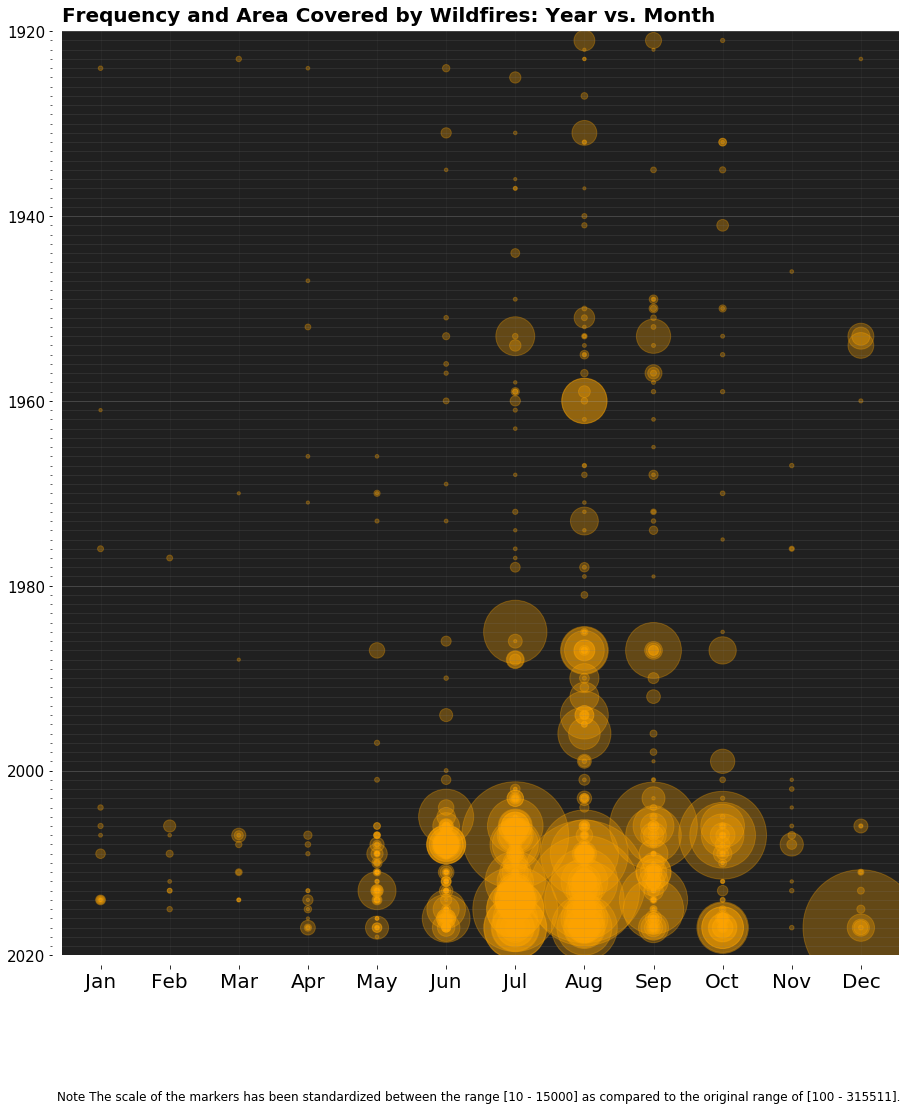

In [191]:
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
s = filtered_data.GIS_ACRES
b = 15000
a = 10
size = ((b-a)*(s - min(s))/(max(s) - min(s))) + a #standardizing the scale of the marker in the range [10, 5000]



plt.figure(figsize=(15, 17))
plt.scatter(filtered_data["MONTH_NAME"], filtered_data["YEAR"], s=size, alpha=0.3, color='orange')

fig = plt.gcf()
ax = plt.gca()

ax.set_facecolor('#202020')

#ax.set_xticklabels(month_name)
#ax.set_xticks(range(len(month_name)), month_name)
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=15)

minorLocator = MultipleLocator(1.0)
majorLocator = MultipleLocator(20)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.grid(color='gray', alpha=0.2, which='minor')
ax.yaxis.grid(color='white', alpha=0.15, which='major')
ax.xaxis.grid(color='gray', alpha=0.1, which='both')

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylim(2020, 1920)

plt.title("Frequency and Area Covered by Wildfires: Year vs. Month", fontsize=20, pad=10, loc='left', fontdict={'fontweight' : 'bold'})

text = "Note The scale of the markers has been standardized between the range [10 - 15000] as compared to the original range of [100 - 315511]."

fig.text(0.12, 0.007, text, fontsize=12)

plt.savefig("year_vs_month.svg", format='svg')

plt.show()

The plot above has this particular theme because the size of markers appropriately show the increasing size of fires while their translucense decreases as more points begin to pile over each other aptly showing the increasing number of fires. The orange-over-black color theme also is analogous to burning fire and looks aesthetically pleasing.

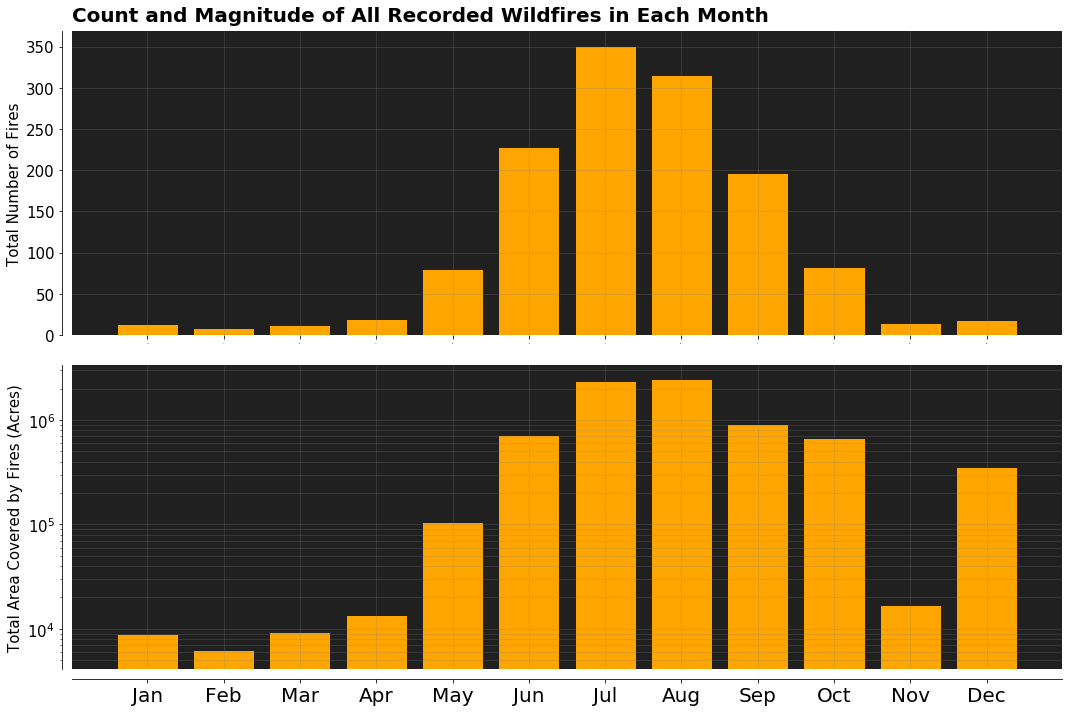

In [192]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title("Count and Magnitude of All Recorded Wildfires in Each Month", fontsize=20, pad=10, loc='left',
          fontdict={'fontweight' : 'bold'})

ax1.set_facecolor('#202020')
#ax1.set_xticklabels(month_name)                                       
ax1.tick_params(axis="x", labelsize=0)
ax1.tick_params(axis="y", labelsize=15)
ax1.xaxis.grid(color='gray', alpha=0.3, which='both')
ax1.yaxis.grid(color='gray', alpha=0.3, which='both')
ax1.set_ylabel("Total Number of Fires", fontsize=15)
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.bar(month_name, filtered_data["MONTH_NAME"].value_counts()[month_name], color='orange', edgecolor='#202020')


ax2.set_facecolor('#202020')
ax2.xaxis.grid(color='gray', alpha=0.3, which='both')
ax2.yaxis.grid(color='gray', alpha=0.3, which='both')
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=15)
ax2.set_ylabel("Total Area Covered by Fires (Acres)", fontsize=15)
ax2.set_yscale('log')
ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 10))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.bar(month_name, total_area, color='orange', edgecolor='#202020')

plt.tight_layout()

plt.savefig("count_and_area.svg", format='svg')

plt.show()

This plot shows the trend of wildfires on a monthly basis. This plot is quite intuitive as number of wildfires and the area burned by them is directly correlated to monthly temperatures, and since summer season in the US is between May to Oct - the counts and total area are higher.

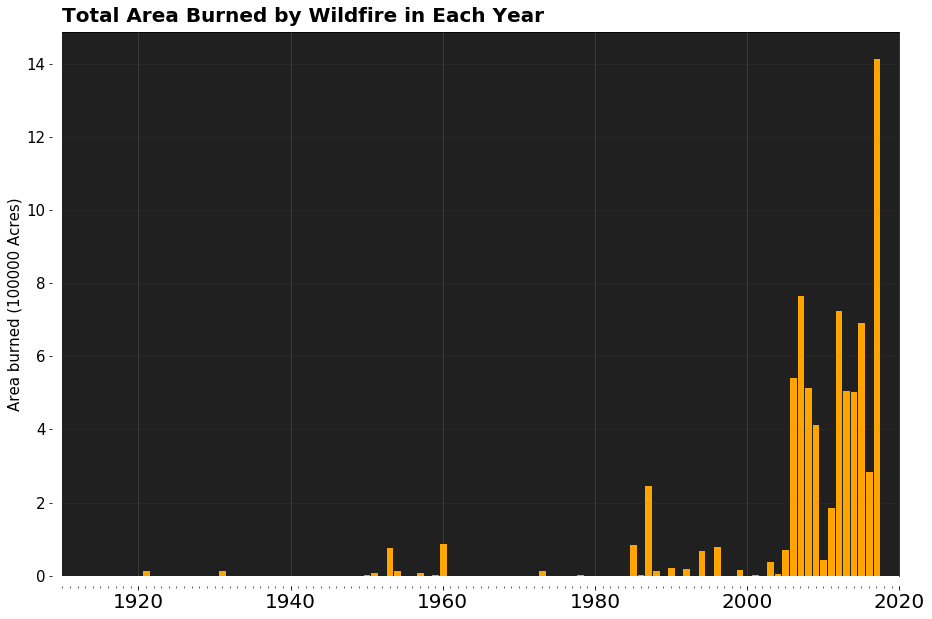

In [193]:
plt.figure(figsize=(15,10))

fig, ax = plt.gcf(), plt.gca()

ax.set_title("Total Area Burned by Wildfire in Each Year", fontsize=20, pad=10, loc='left',
          fontdict={'fontweight' : 'bold'})

ax.set_facecolor('#202020')
plt.bar(range(1920, 2020), np.array(total_area_year)/100000., color='orange', width=1.0, edgecolor='#202020' )

minorLocator = MultipleLocator(1.0)
majorLocator = MultipleLocator(20)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.grid(color='gray', alpha=0.01, which='minor')
ax.xaxis.grid(color='white', alpha=0.15, which='major')

ax.yaxis.grid(color='gray', alpha=0.1, which='major')
#ax.xaxis.grid(color='white', alpha=0.15, which='major')

ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=15)

ax.set_ylabel("Area burned (100000 Acres)", fontsize=15)

ax.set_xlim(1910, 2020)
#ax.set_yscale('symlog')

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("area_vs_year.svg", format='svg')

plt.show()

This plot is interesting because one can see the exponential growth in the size of wildfires over the years. Initially, I thought I would use a logarithmic scale for y-axis so that bars along the early years are more visible but I decided not to as this is more realistic and really makes you think about the global warming.

__Summary:__ The following plots tells us an increasing number of recorded wildfires and the area covered by them. Followiing are some observations:
- The number of recorded fires increase as the years progress. This rise could be due to loss of records from fire that were earlier during the timeline or due to the effects of rise in average temperature caused by global warming. More flora is now susceptible to catching fire.
- The area covered by the fires has also increased massively. This suggests that wildfires are becoming more difficult to contain as more flora dries up (making it more prone to catching fire) due to excessive heat.
- The number of wildfires and size increases rapidly between May and Aug as climate starts to warm up during summers.
- The last plot shows how wildfires have started to burn area at an exponential rate as compared to previous year.

In [194]:
#saving datafile
filtered_data.to_csv("california_wildfires.csv")